# Proyecto Individual 1 (MLOPs): Sistema de Recomendación de Películas

## EDA

In [12]:
'''Importamos las librerías necesarias'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
sns.set()

In [13]:
''' Importamos el dataset limpio'''

movies_df = pd.read_csv('C:/Users/Luis/Documents/Universidad-Trabajo/SoyHenry/LABS/Proyecto_1/Datasets/Movies_limpio.csv')

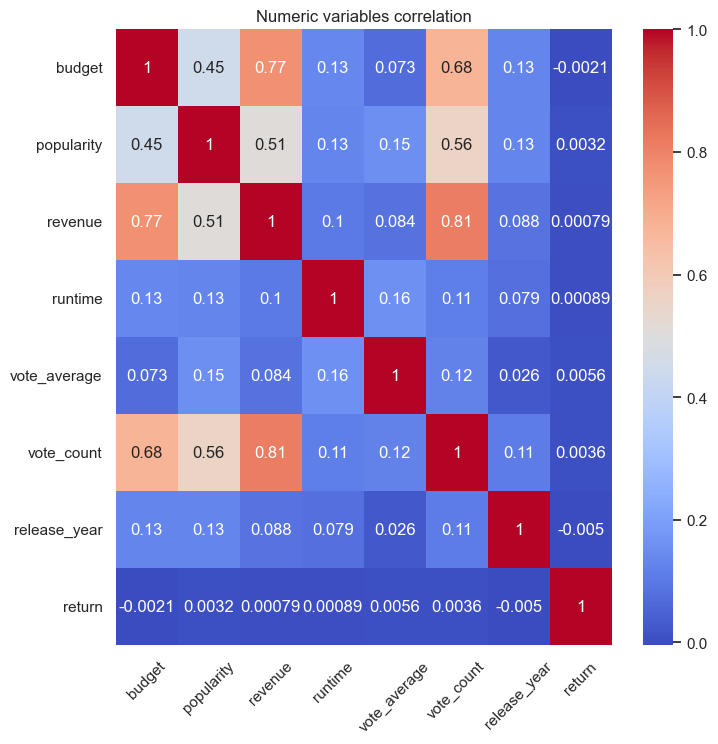

In [3]:
'''Veamos la correlación de Pearson de las variables numéricas con un heatmap'''

corr = movies_df.drop(columns = ['id']).corr(numeric_only = True) 
plt.figure(figsize = (8, 8))
sns.heatmap(corr, annot = True, cmap= 'coolwarm')
plt.title('Numeric variables correlation')
plt.xticks(rotation = 45)
plt.show()

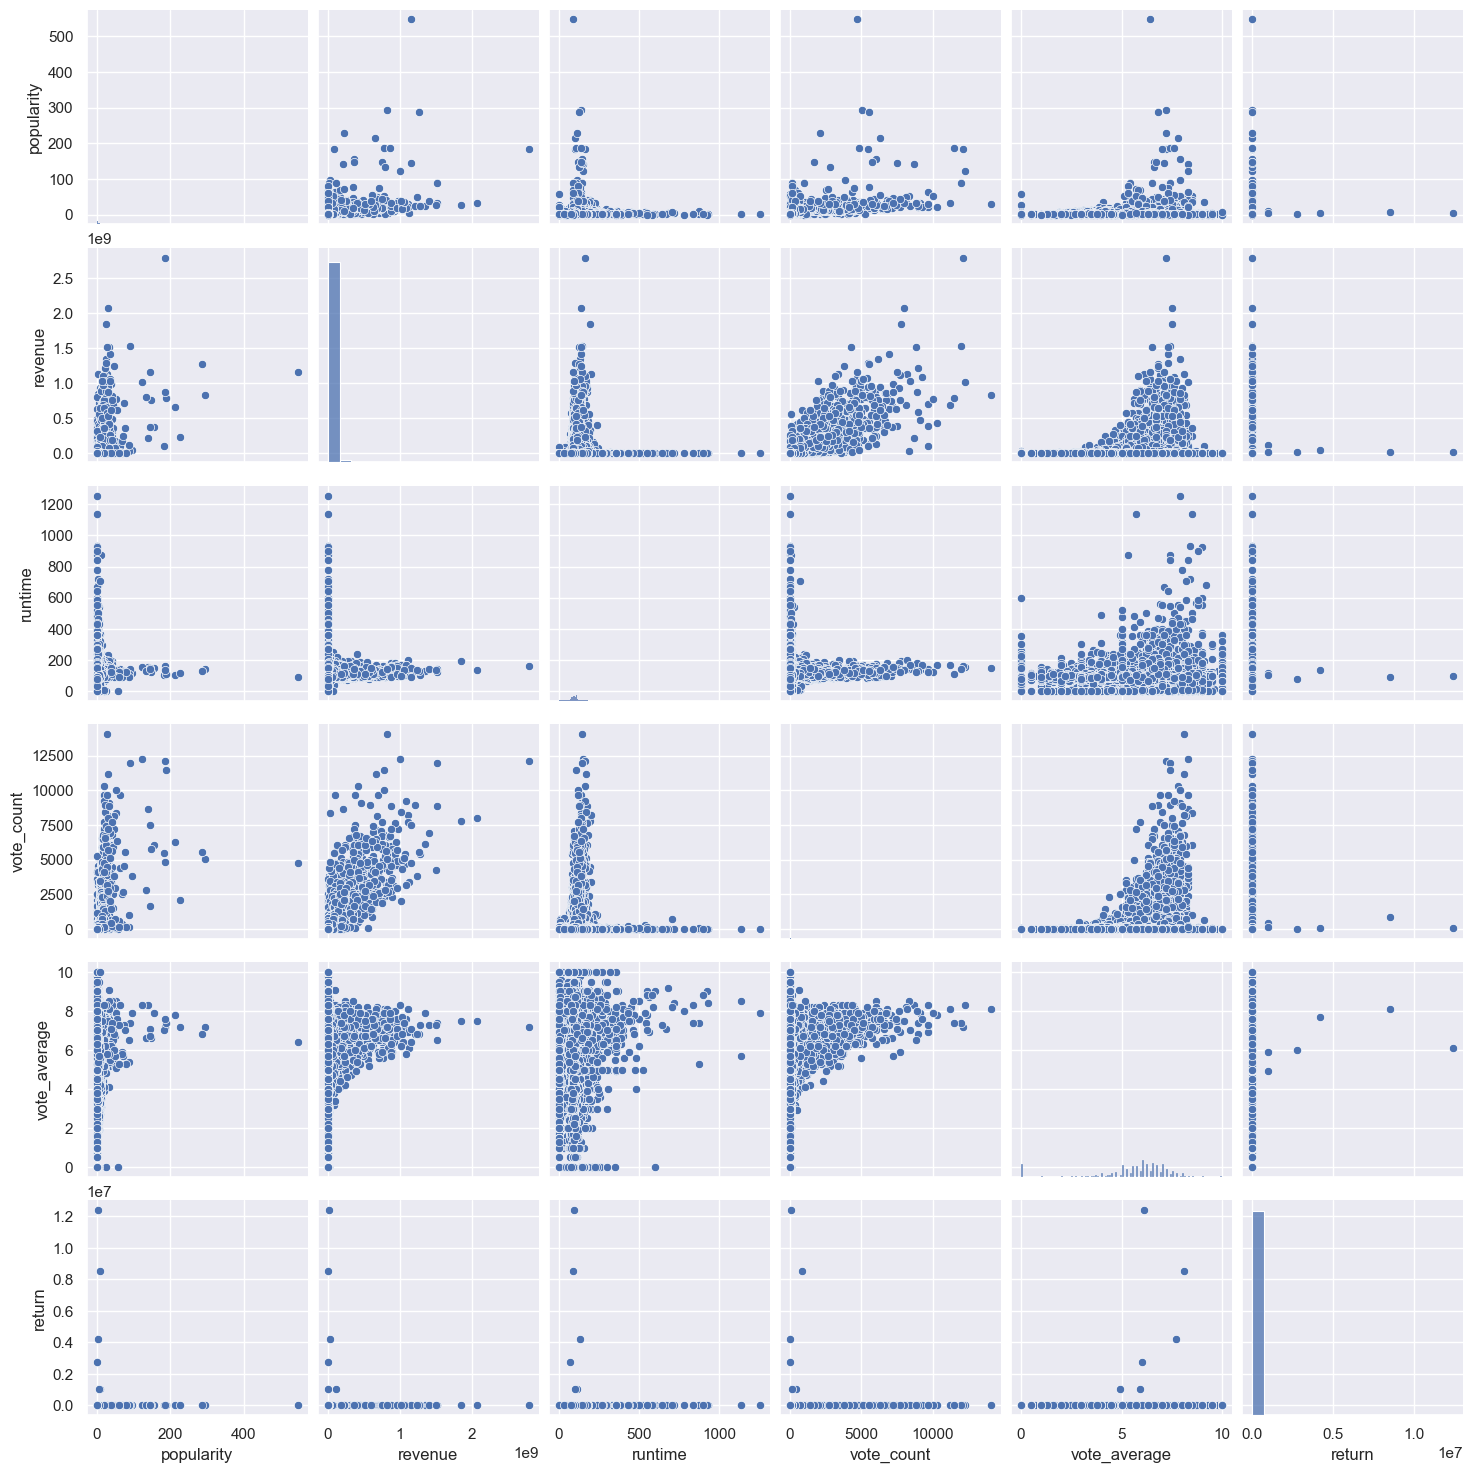

In [4]:
''' Creemos un pairplot con las columnas numéricas para observar mejor la distribución de los valores. Se tomarán
    popularity, revenue, runtime, vote_count, vote_average y return'''

numeric = ['popularity', 'revenue', 'runtime', 'vote_count', 'vote_average', 'return']

sns.pairplot(movies_df[numeric])
plt.show()

In [5]:
''' Convertimos la columna genres a lista:'''

movies_df['genres'] = movies_df['genres'].apply(lambda x: eval(x))

In [6]:
''' Creamos una lista con los géneros presentes en todo el dataframe'''

genres_list = set()
for i in movies_df['genres']:
    genres_list = set().union(i, genres_list)
    genres_list = list(genres_list)

''' Convertimos la columna genre en string'''

movies_df['genres'] = movies_df['genres'].apply(lambda x: ' '.join(x))

In [7]:
'''Creamos las columnas con los géneros en el nuevo dataframe'''

for l in genres_list:
    movies_df[l] = movies_df['genres'].str.contains(l).apply(lambda x: 1 if x else 0)

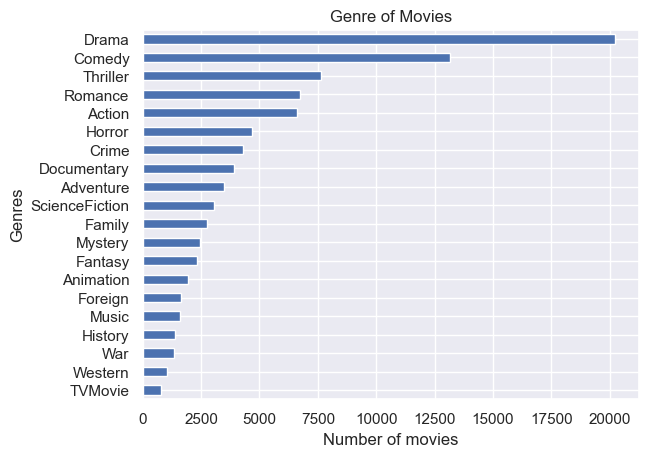

In [8]:
''' Ahora grafiquemos la cantidad de películas en cada género'''

genres_df = movies_df.loc[:, genres_list] # Creamos un dataframe con los géneros
genres_df.index = movies_df['release_year'] # Cambiamos los índices por los años de las películas
genres_df_group = genres_df.groupby('release_year').sum() # Agrupamos los valores por año
genres_sum = genres_df_group.sum(axis = 0) # Obtenemos la suma de películas por género

genres_sum.sort_values(ascending = True).plot(kind = 'barh', label = 'genres')
plt.title('Genre of Movies')
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.show()

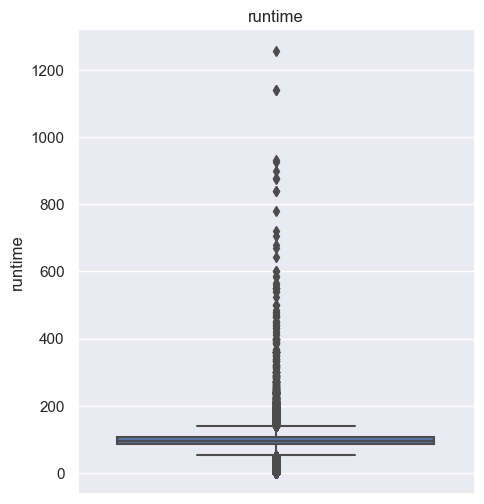

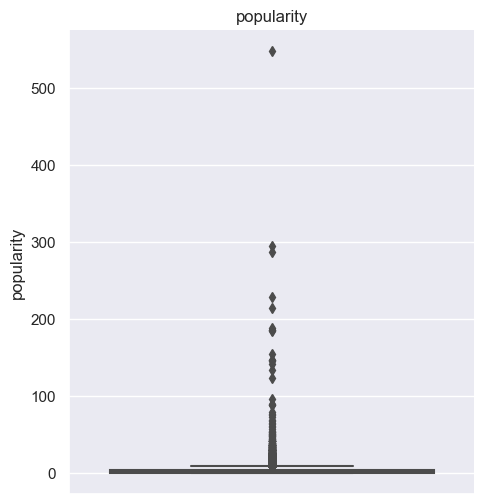

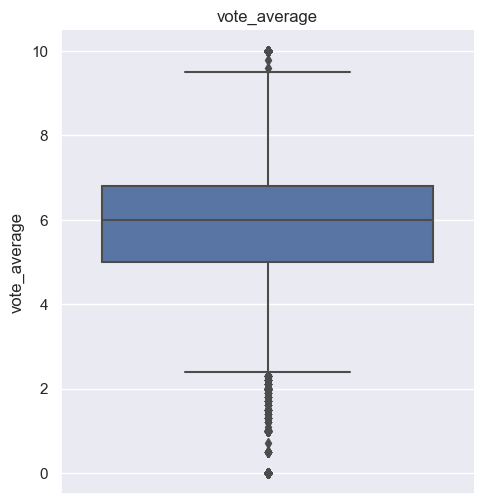

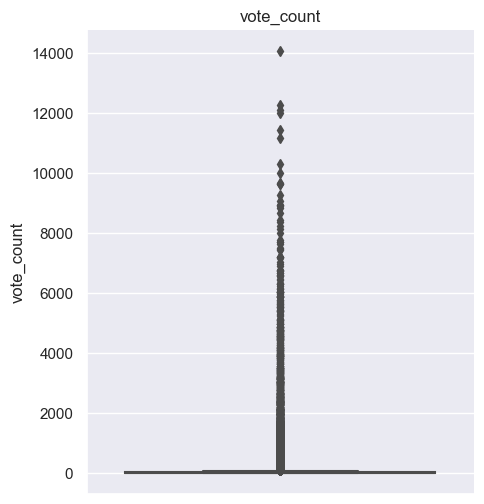

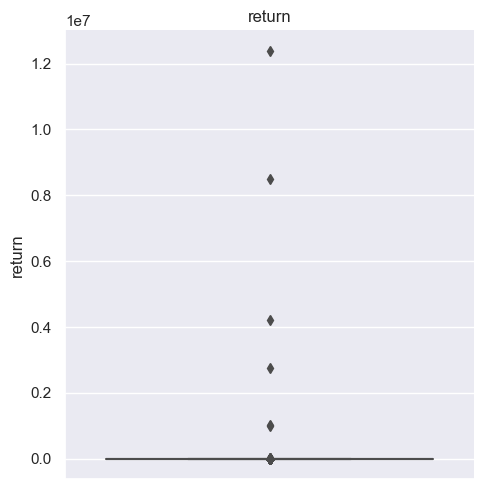

In [46]:
''' Podemos observar la distribución de runtime, popularity, vote_average, vote_count y return'''

numeric = ['runtime', 'popularity', 'vote_average', 'vote_count' , 'return'] # Lista de las columnas a graficar

for l in numeric:
    sns.catplot(movies_df, y = l, kind = 'box')
    plt.title(l)
    plt.show()

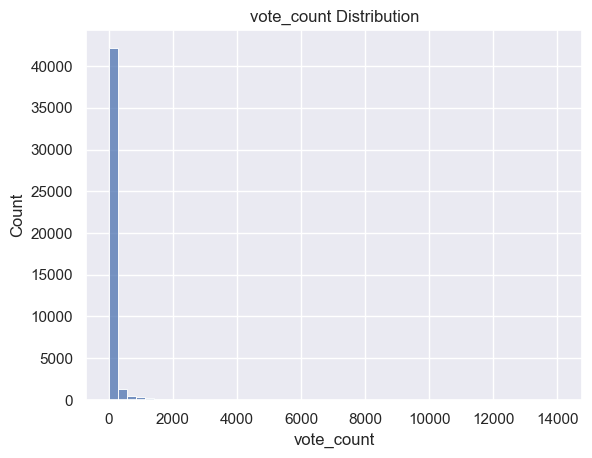

In [47]:
''' Observemos la distribución de vote_count y vote_average a través de un histograma'''

'''Primero el histograma de vote_count'''

sns.histplot(movies_df, x = 'vote_count', bins = 50)
plt.title('vote_count Distribution')
plt.show()

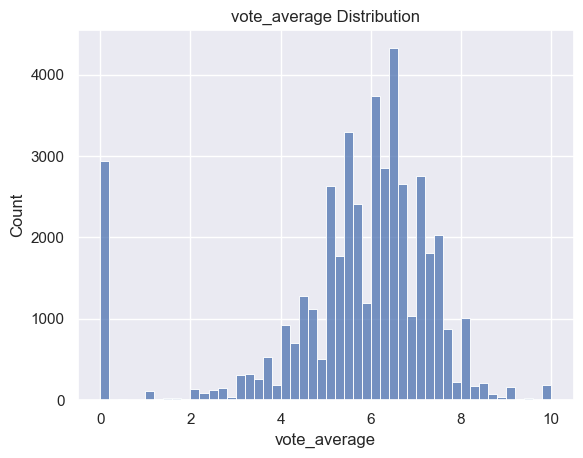

In [48]:
''' Histograma de vote_average'''

sns.histplot(movies_df, x = 'vote_average', bins = 50)
plt.title('vote_average Distribution')
plt.show()

In [15]:
''' Grafiquemos una nube de palabras a partir de los títulos'''

''' Primero generamos una lista con los títulos'''

title_list = []
for i in range(0, movies_df.shape[0]):
    title_list.append(movies_df.loc[i, 'title'])

title_string = ' '.join(title_list) # Convertimos la lista de títulos a string

'''Graficamos la nube de palabras utilizando la libería wordcloud y matplotlib'''

wc = wordcloud.WordCloud(background_color = 'white', max_words = 200, max_font_size = 100, random_state = 123, colormap = 'Dark2')
wc.generate(title_string)
plt.figure(figsize = (200, 100))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
''' Grafiquemos una nube de palabras a partir de los actores'''

''' Convertimos la lista de la columna acotes a string'''

movies_df['cast'] = movies_df['cast'].apply(lambda x: eval(x)) # Damos formato lista a los valores de cast

movies_df['cast'] = movies_df['cast'].apply(lambda x: ' '.join(x)) # Transformamos la lista a string

''' Generamos una lista con los actores'''

actor_list = []
for i in range(0, movies_df.shape[0]):
    actor_list.append(movies_df.loc[i, 'cast'])

actor_string = ' '.join(actor_list) # Convertimos la lista de cast a string

'''Graficamos la nube de palabras utilizando la libería wordcloud y matplotlib'''

wc2 = wordcloud.WordCloud(background_color = 'white', max_words = 200, max_font_size = 100, random_state = 123, colormap = 'Dark2')
wc2.generate(actor_string)
plt.figure(figsize = (200, 100))
plt.imshow(wc2)
plt.axis('off')
plt.show()

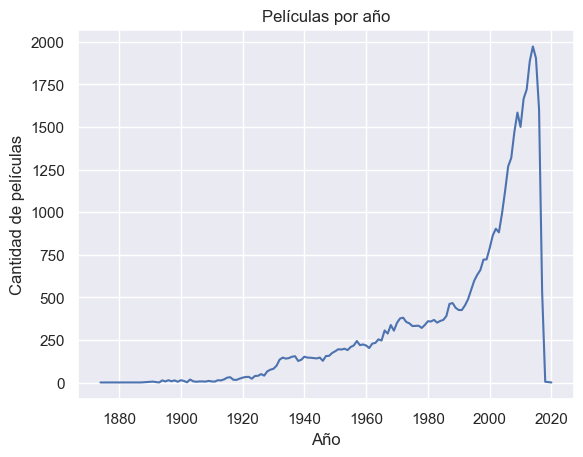

In [11]:
''' Evaluemos las películas por año. Para ello haremos un gráfico de líneas con la cantidad de películas por año'''

'''Creamos un dataframe con los años y la cantidad de películas en cada año'''
year_df = pd.DataFrame(movies_df.groupby('release_year').count().loc[:, 'id'])
year_df = year_df.reset_index()

''' Realizamos el gráfico de líneas'''

sns.lineplot(year_df, x = 'release_year', y = 'id')
plt.title('Películas por año')
plt.ylabel('Cantidad de películas')
plt.xlabel('Año')
plt.show()